In [44]:
!date

Thu Apr 10 08:07:13 PM EDT 2025


In [45]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [46]:
import os
import numpy as np
import pandas as pd
import ants
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [47]:
def load_pickle(fn):
    if os.path.exists(fn):
        with open(fn, 'rb') as file:
            loaded_dict = pickle.load(file)
    return loaded_dict

In [48]:
indir = '../Data/StudyForrest/fmriprep/'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
n = len(subs)
n

14

In [49]:
data_dir = '../Data/StudyForrest/ensembles_last_CVAE/'
abl = [a for a in os.listdir(data_dir) if 'ablations' in a]
abl.sort()
abl

['DeepCor-Forrest-ablations-00-baseline',
 'DeepCor-Forrest-ablations-01-nosummation',
 'DeepCor-Forrest-ablations-02-noAdvRemoval',
 'DeepCor-Forrest-ablations-03-noNCC',
 'DeepCor-Forrest-ablations-03-noTC',
 'DeepCor-Forrest-ablations-04-noCoords']

In [50]:
abl = ['DeepCor-Forrest-ablations-00-baseline',
 'DeepCor-Forrest-ablations-01-nosummation',
 'DeepCor-Forrest-ablations-02-noAdvRemoval',
 'DeepCor-Forrest-ablations-03-noNCC',
 'DeepCor-Forrest-ablations-03-noTC',]

In [51]:
def get_sub_data(s,r,analysis_dir,return_type='corr'):
    output_files = [os.path.join(analysis_dir,val) for val in os.listdir(analysis_dir) if val.startswith(f'outputs_S{s}_R{r}_')]
    vals_ffa = load_pickle(output_files[0])['ffa']
    vals_compcor = load_pickle(output_files[0])['ffa_compcorr']
    face_reg = load_pickle(output_files[0])['face_reg']
    vals_signals = np.array([load_pickle(output_file)['signal'] for output_file in output_files])
    vals_signals_med = np.median(vals_signals,0)
    #vals_signals_med = np.average(vals_signals,0)

    r_ffa = np.array([np.corrcoef(vals_ffa[v,:],face_reg)[0,1] for v in range(vals_ffa.shape[0])]).mean()
    r_compcor = np.array([np.corrcoef(vals_compcor[v,:],face_reg)[0,1] for v in range(vals_ffa.shape[0])]).mean()
    r_fg = np.array([np.corrcoef(vals_signals_med[v,:],face_reg)[0,1] for v in range(vals_ffa.shape[0])]).mean()
    
    if return_type=='corr':
        return (r_ffa,r_compcor,r_fg)
    elif return_type=='vals':
        return vals_ffa,vals_compcor,vals_signals_med,vals_signals,face_reg

In [52]:
#analysis_dir = os.path.join('../Data/StudyForrest/ensembles_last_CVAE/',analysis_name)

In [53]:
a_names = [val.split('-')[-1] for val in abl]
a_names

['baseline', 'nosummation', 'noAdvRemoval', 'noNCC', 'noTC']

In [54]:
s = 0
r = 1
a = 4
c = [get_sub_data(s,r,os.path.join(data_dir,a),return_type='corr') for a in abl]
c = np.array(c)

In [55]:
diff = c[:,2]-c[:,1]
xs = np.arange(len(diff))

<BarContainer object of 5 artists>

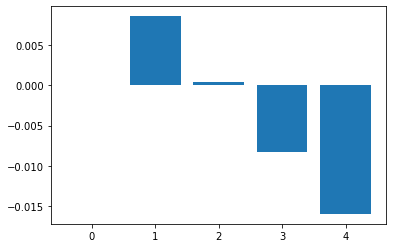

In [56]:
plt.bar(xs,diff-diff[0])